本章我们用Tensorflow读取MNIST手写数字识别数据集

导入Tensorflow模块

In [1]:
import tensorflow as tf

导入Tensorflow读取MNIST数据集模块

In [2]:
import tensorflow.examples.tutorials.mnist.input_data as input_data

第一次执行会下载MNIST数据

In [3]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


读取MNIST数据，再次运行时，由于已经下载了文件，只需读取文件即可，因此时间不会太长

In [4]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


查看MNIST数据

In [6]:
print('train', mnist.train.num_examples,
     ',validation', mnist.validation.num_examples,
     ',test', mnist.test.num_examples)

train 55000 ,validation 5000 ,test 10000


# 查看训练数据

训练数据由images和labels组成

In [7]:
print('train images:', mnist.train.images.shape,
     'labels:', mnist.train.labels.shape)

train images: (55000, 784) labels: (55000, 10)


查看第0项images图像的长度，我们可以看到一共有784个数字

In [8]:
len(mnist.train.images[0])

784

查看第0项图像的内容。一共有784个数值，Tensorflow已经进行了标准化，数值都介于0和1之间，所以不需要标准化

In [9]:
mnist.train.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

定义plot_image函数显示图像

In [10]:
import matplotlib.pyplot as plt
def plot_image(image):
    plt.imshow(image.reshape(28, 28), cmap = 'binary')
    plt.show()

执行plot_image函数

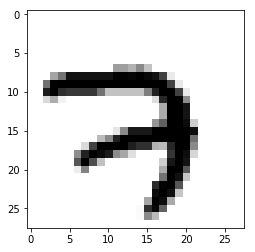

In [11]:
plot_image(mnist.train.images[0])

可以看到第0项数据是7的图像

查看训练标签labels的数据，在读取数据集时，one_hot=True设置了标签是One-Hot Encoding向量

In [12]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

从0算起第7个数字是1，故该数字是7

使用argmax显示数字

One-Hot Encoding格式阅读不是很方便，我们可以使用np.argmax转换为0-9的数字

In [13]:
import numpy as np
np.argmax(mnist.train.labels[0])

7

# 查看多项训练数据的images和labels

为了便于查看多项数据的images和labels，我们修改第6章所创建的plot_images_labels_prediction()函数，修改如下

In [14]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num = 10):
#函数的参数分别是images（数字图像），labels（真实值），prediction（预测结果），idx(开始显示的数据index)，num(要显示的数据项数，默认是10.不超过25)
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        #绘制图形
        ax = plt.subplot(5, 5, i + 1)
        ax.imshow(np.reshape(images[idx],(28, 28)), cmap = 'binary')
        title = 'label=' + str(np.argmax(labels[idx]))#设置标题
        if len(prediction)>0:#如果传入了预测结果
            title+= ',predict=' + str(prediction[idx])#标题
        
        ax.set_title(title, fontsize = 10)#设置子图形标题
        ax.set_xticks([]);ax.set_yticks([])#设置不显示刻度
        idx+=1#读取下一项
    plt.show()

查看训练数据的前10项数据

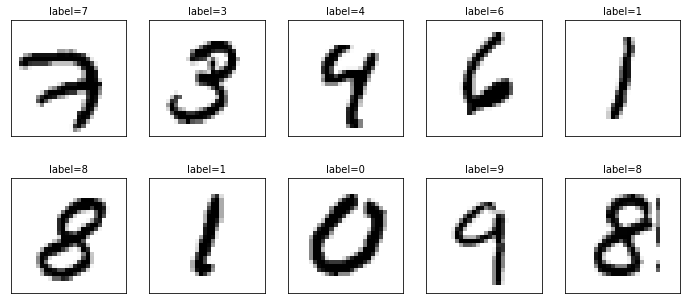

In [15]:
plot_images_labels_prediction(mnist.train.images, mnist.train.labels, [], 0)

查看validation数据项数

In [16]:
print('validation images:', mnist.validation.images.shape,
     'labels:', mnist.validation.labels.shape)

validation images: (5000, 784) labels: (5000, 10)


可以看到validation数据一共有5000项

显示validation数据的前10项

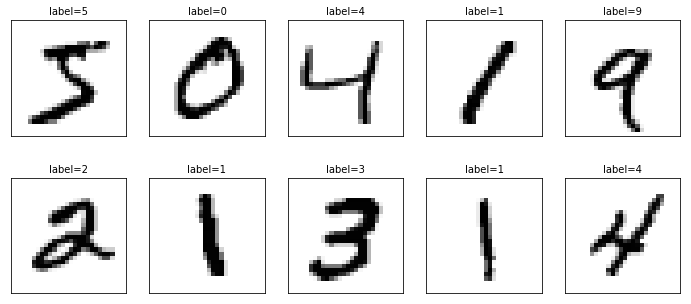

In [17]:
plot_images_labels_prediction(mnist.validation.images, mnist.validation.labels, [], 0)

查看test数据项数

In [18]:
print('test images:', mnist.test.images.shape,
     'labels:', mnist.test.labels.shape)

test images: (10000, 784) labels: (10000, 10)


一共有10000项test数据

查看test数据

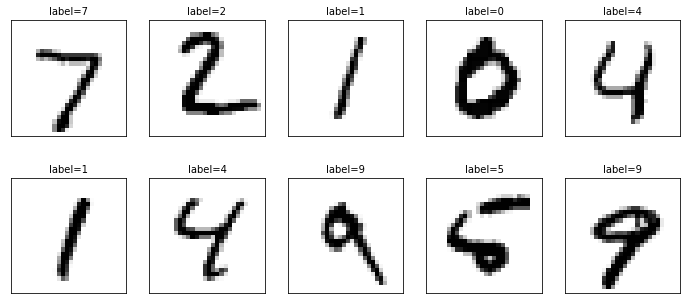

In [19]:
plot_images_labels_prediction(mnist.test.images, mnist.test.labels, [], 0)

# 批次读取MNIST数据

在深度学习模型的训练时，我们并不是一次性读取所有数据，而是批次读取数据（例如100项）进行训练。在Tensorflow的MNIST模块中，已经提供了mnist.train.next_batch方法，可以按照批次读取数据。

读取批次数据

下面的程序用mnist.train.next_batch方法传入参数batch_size=100, 每次只读取100项批次数据。读取的结果会保存在batch_images_xs和batch_labels_ys中

In [21]:
batch_images_xs, batch_labels_ys = mnist.train.next_batch(batch_size=100)

查看批次数据项数

In [22]:
print(len(batch_images_xs), len(batch_labels_ys))

100 100


查看批次数据

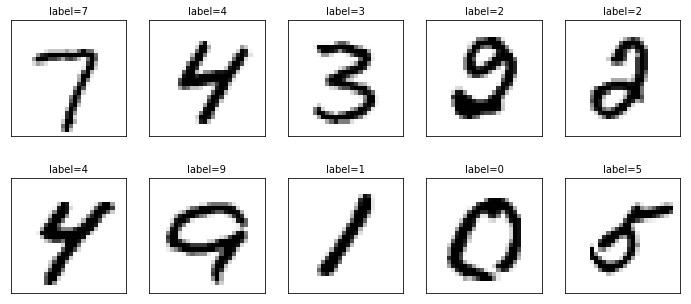

In [23]:
plot_images_labels_prediction(batch_images_xs,  batch_labels_ys, [], 0)